In [2]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Age'>

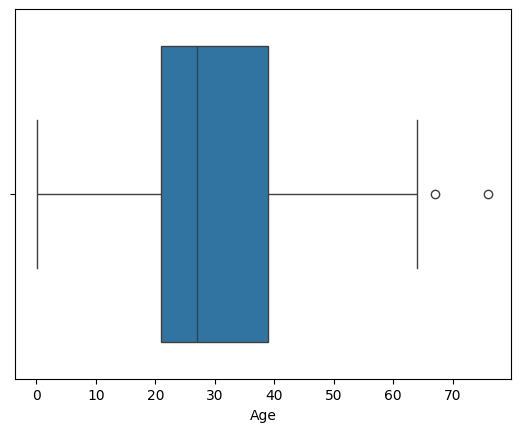

In [6]:
sns.boxplot(x = df['Age'])

In [8]:
percentile25= df['Age'].quantile(0.25)
percentile75= df['Age'].quantile(0.75)

In [9]:
IQR = percentile75 - percentile25
IQR


np.float64(18.0)

In [10]:
upper_limit = percentile75 + 1.5*IQR
upper_limit


np.float64(66.0)

In [11]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-6.0)

In [12]:
df[df['Age' ]< upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [15]:
df[df['Age' ]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
df_new=df[df['Age' ]< upper_limit]

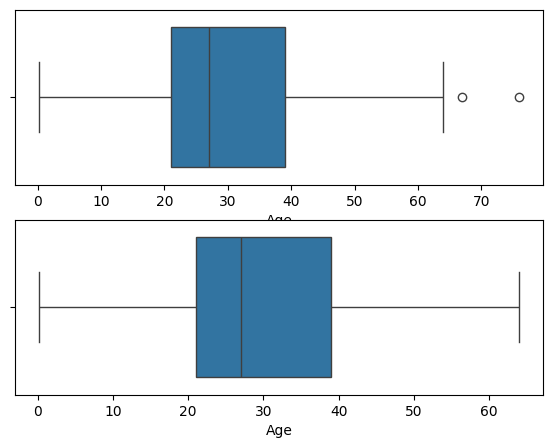

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df['Age'])
plt.subplot(224)
sns.boxplot(x = df_new['Age'])
plt.show()

In [19]:
# cca

In [20]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [21]:
colm = [var for var in df.columns if df[var].isnull().mean() < 0.50 and df[var].isnull()
.mean() > 0]
colm

['Age', 'Fare']

In [23]:
len(df[colm].dropna()) / len(df)

0.7918660287081339

In [25]:
new_df = df[colm].dropna()
df.shape, new_df.shape

((418, 12), (331, 2))

<Axes: >

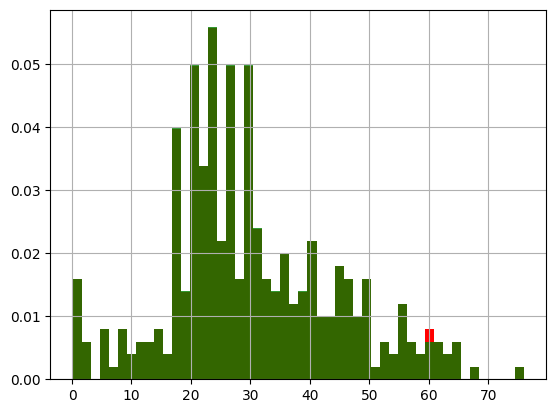

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].hist(bins=50, ax=ax, density=True, color='red')
new_df['Age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)